In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
airbnb=pd.read_excel("Airbnb.xlsx")

In [6]:
airbnb.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


<Axes: title={'center': 'review ratings based on latitude and longitude'}, xlabel='lat', ylabel='long'>

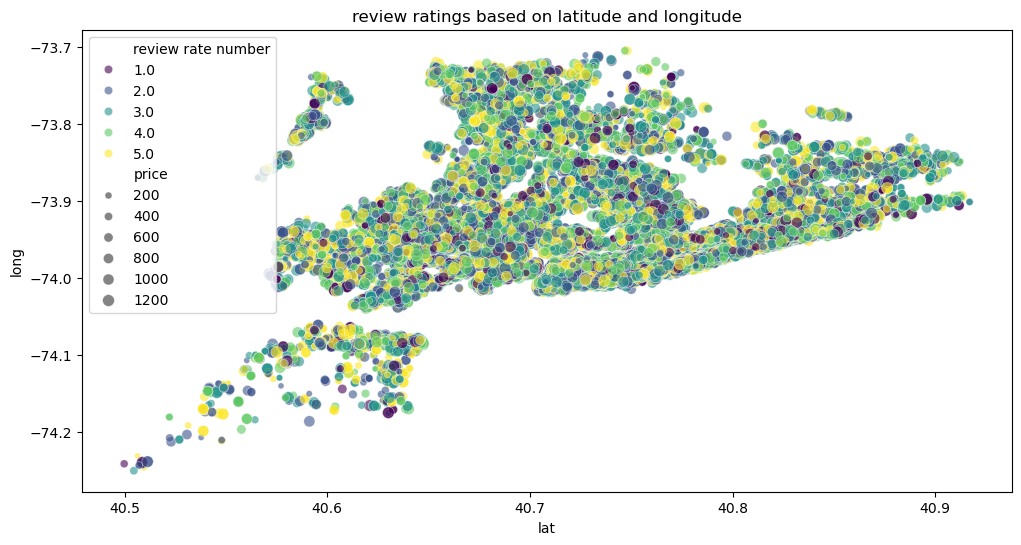

In [42]:
plt.figure(figsize=(12, 6)) 
plt.title("review ratings based on latitude and longitude")
sns.scatterplot(x='lat' , y='long',hue='review rate number',size='price',alpha=0.6, palette="viridis",data=airbnb)

<Axes: title={'center': 'Price Trend'}, xlabel='price', ylabel='Count'>

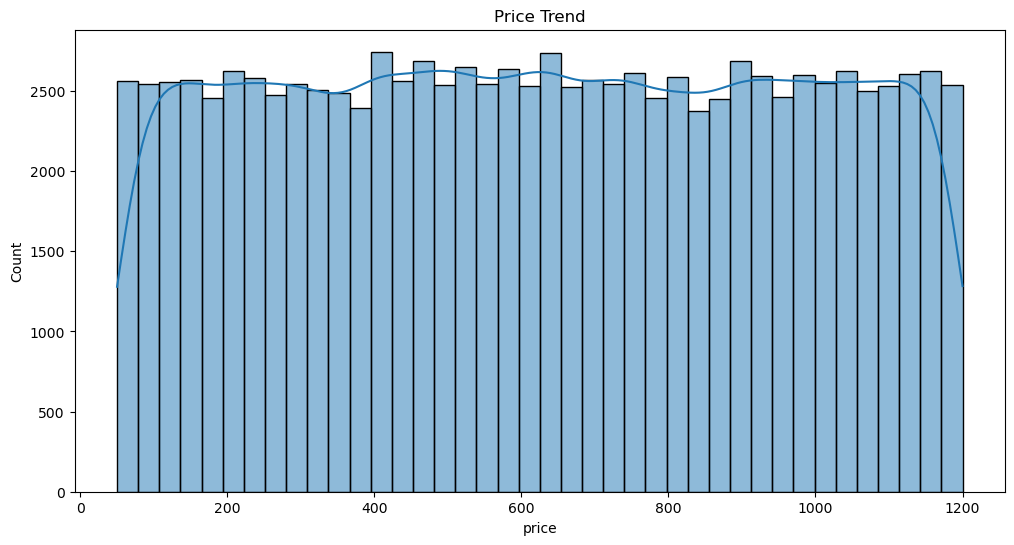

In [8]:
plt.figure(figsize=(12, 6)) 
plt.title("Price Trend")
sns.histplot(airbnb["price"],kde=True,bins=40)

<Axes: title={'center': 'rating based on room type according to cancellation policy '}, xlabel='room type', ylabel='review rate number'>

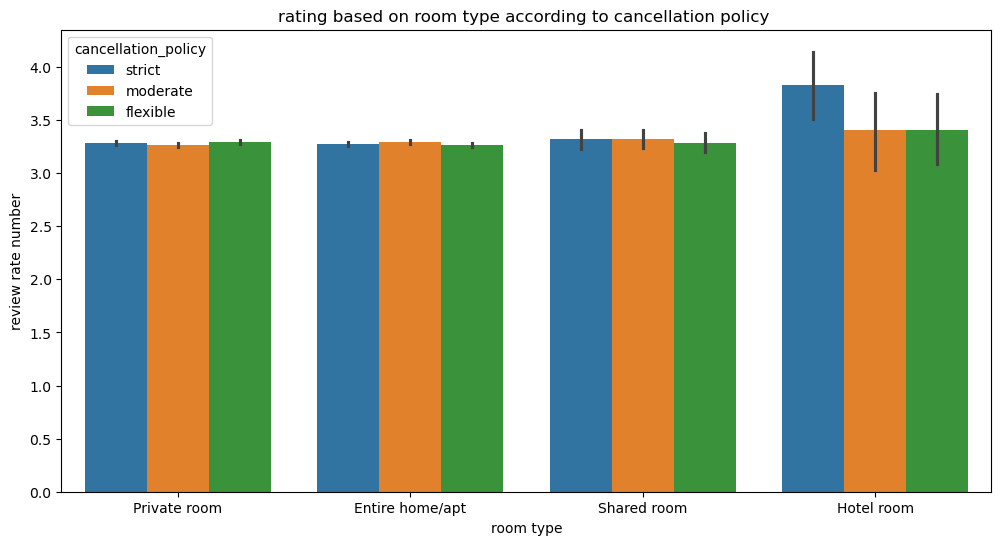

In [9]:
plt.figure(figsize=(12, 6)) 
plt.title("rating based on room type according to cancellation policy ")
sns.barplot(x='room type',y='review rate number',hue='cancellation_policy',data=airbnb)

In [11]:
tophost=airbnb['host name'].value_counts().head(5)

In [12]:
tophost

host name
Michael         881
David           764
John            581
Alex            546
Sonder (NYC)    516
Name: count, dtype: int64

<Axes: title={'center': 'top hosts'}, ylabel='host name'>

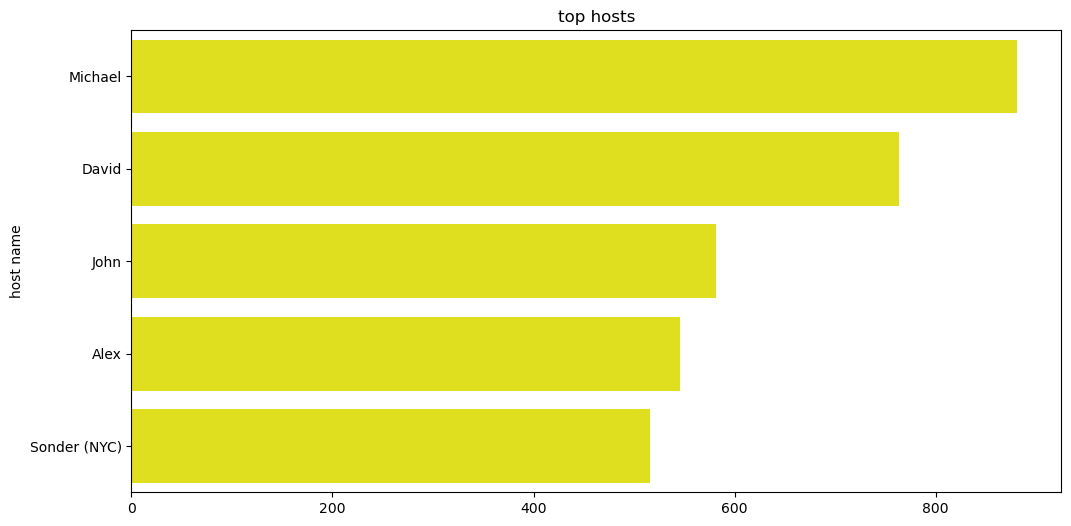

In [18]:
plt.figure(figsize=(12, 6)) 
plt.title("top hosts")
sns.barplot(x=tophost.values ,y=tophost.index,color='yellow')

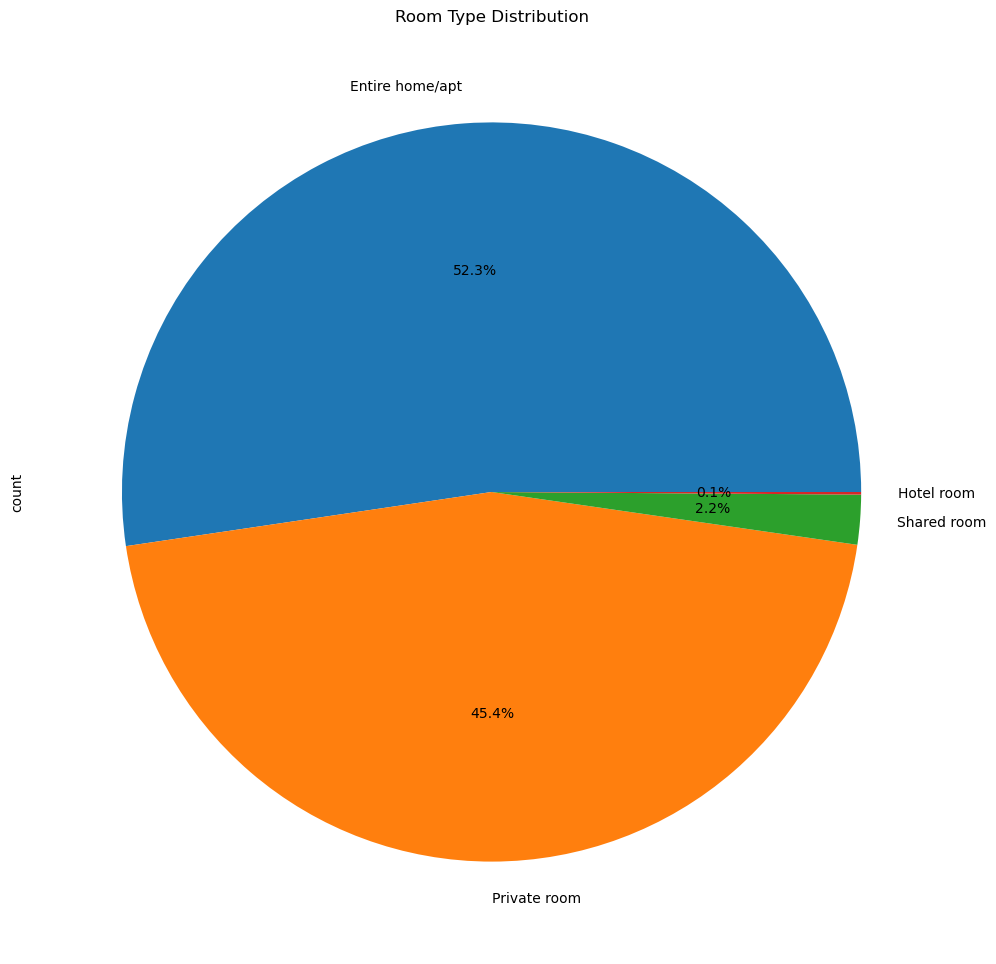

In [20]:
airbnb['room type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(12,12))
plt.title("Room Type Distribution")
plt.show()

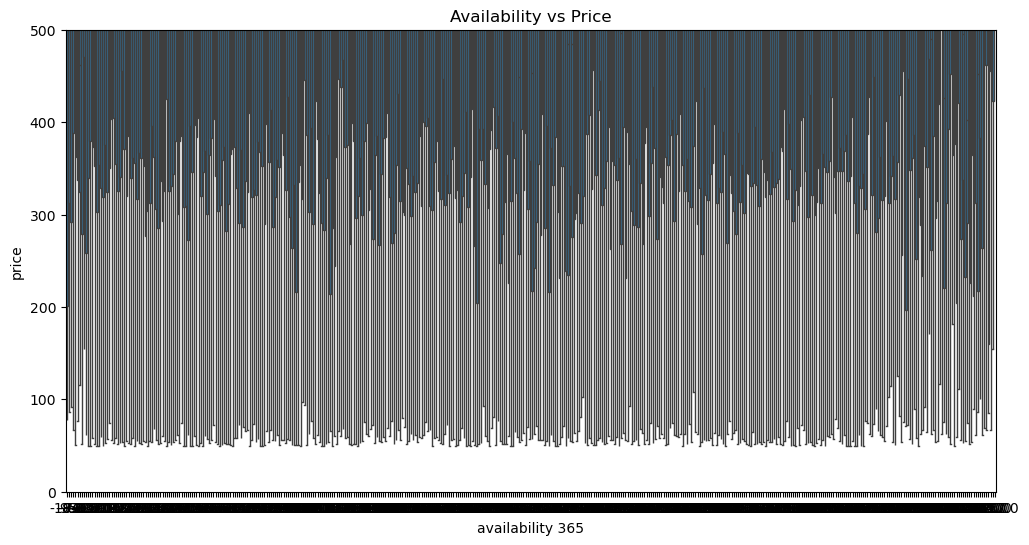

In [28]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x="availability 365", y="price", data=airbnb)
plt.ylim(0, 500)
plt.title("Availability vs Price")
plt.show()


<Axes: xlabel='host_identity_verified', ylabel='count'>

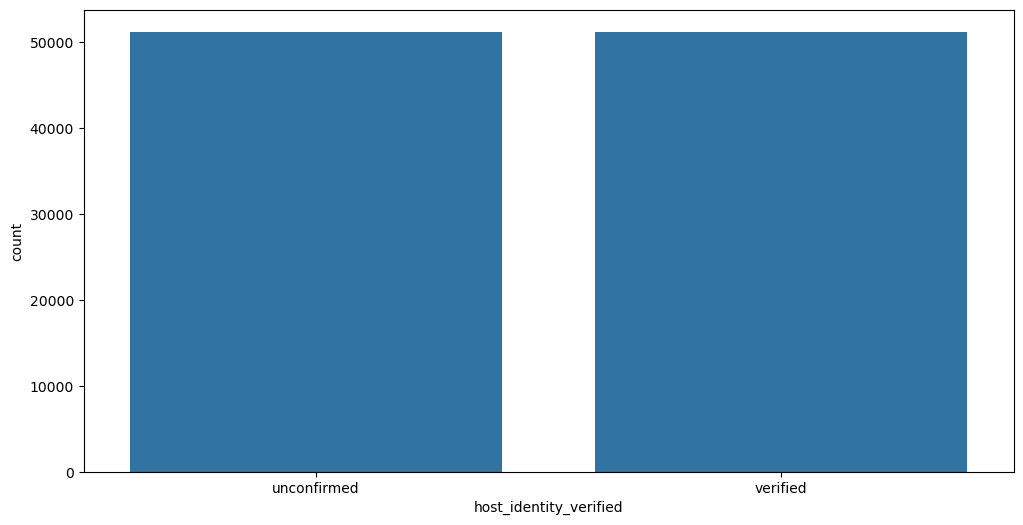

In [32]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x=airbnb['host_identity_verified'])


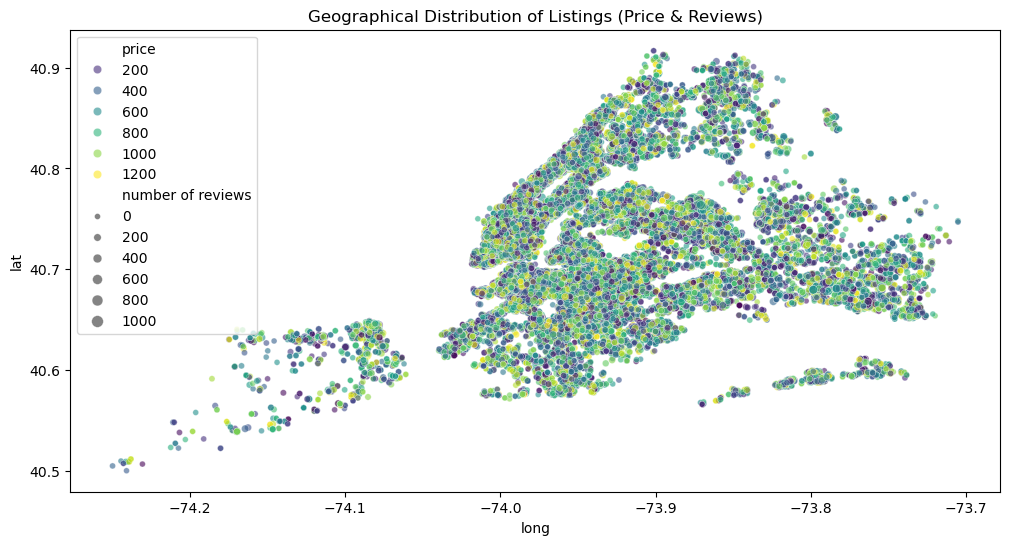

In [41]:
plt.figure(figsize=(12, 6)) 
sns.scatterplot(x="long", y="lat", data=airbnb, hue="price", size="number of reviews", alpha=0.6, palette="viridis")
plt.title("Geographical Distribution of Listings (Price & Reviews)")
plt.show()

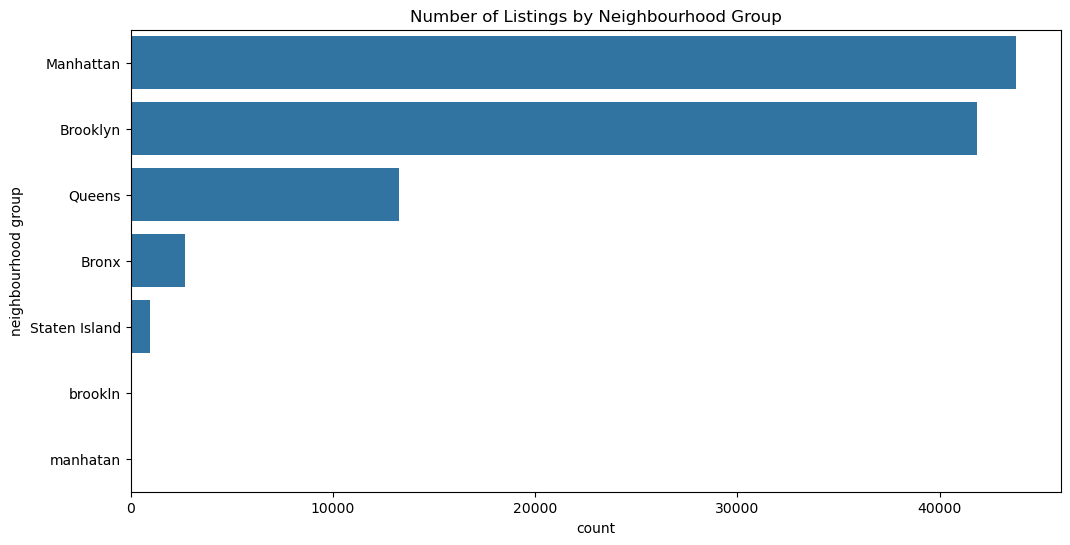

In [40]:
plt.figure(figsize=(12, 6)) 
sns.countplot(y="neighbourhood group", data=airbnb, order=airbnb['neighbourhood group'].value_counts().index)
plt.title("Number of Listings by Neighbourhood Group")
plt.show()

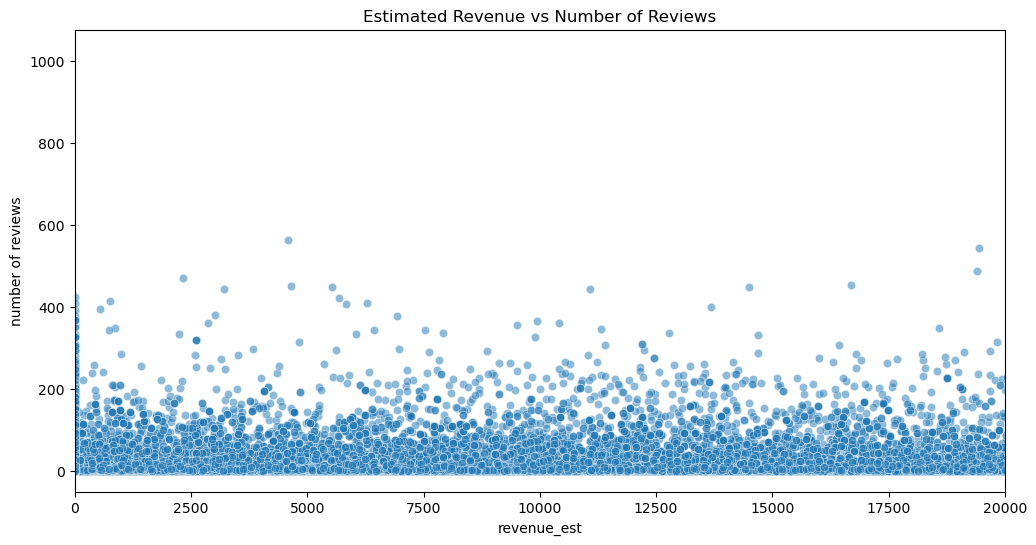

In [39]:
plt.figure(figsize=(12, 6)) 
airbnb['revenue_est'] = airbnb['price'] * airbnb['availability 365']
sns.scatterplot(x="revenue_est", y="number of reviews", data=airbnb, alpha=0.5)
plt.xlim(0, 20000)
plt.title("Estimated Revenue vs Number of Reviews")
plt.show()


In [46]:
pivair=airbnb.pivot_table(values='number of reviews',index='neighbourhood group',columns='review rate number')
pivair

review rate number,1.0,2.0,3.0,4.0,5.0
neighbourhood group,,,,,
Bronx,45.163636,29.526756,33.365468,31.310185,27.784380
Brooklyn,32.711404,27.954598,27.643935,27.725931,28.663859
Manhattan,29.624131,23.637770,23.489407,23.817243,23.119491
Queens,47.273810,32.159265,31.705226,31.552486,34.895254
Staten Island,38.148148,38.580645,34.470588,32.220588,34.932806
brookln,NaN,NaN,NaN,167.000000,NaN
manhatan,NaN,NaN,260.000000,NaN,NaN


<Axes: xlabel='review rate number', ylabel='neighbourhood group'>

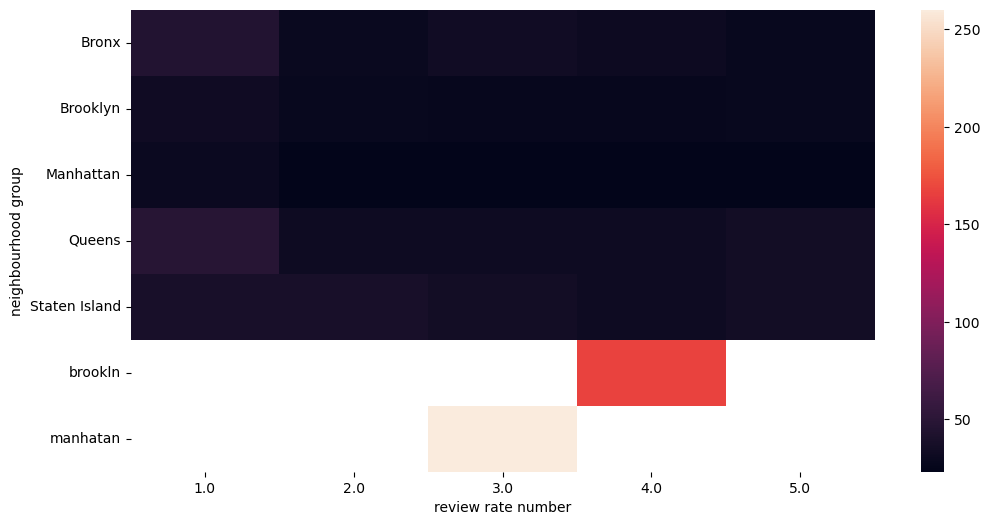

In [47]:
plt.figure(figsize=(12, 6)) 
plt.title("rating based on number of reviews over a  ")

sns.heatmap(pivair)
